# **Лабораторная работа №1**
# Описание датасета о ноутбуках.

## Предметная область
Анализ рынка ноутбуков. Данные могут помочь в исследовании ценообразования и предпочтений потребителей.

## Источник данных
Датасет доступен на платформе Kaggle, что обеспечивает его надежность и актуальность.

## Характер данных
Данные являются реальными, собранными с площадок продаж ноутбуков.

## Атрибуты датасета
1. **brand** (строковый): Название бренда ноутбука.
2. **Price** (числовой): Стоимость ноутбука в индийских рупиях.
3. **Rating** (числовой): Рейтинг, присваиваемый каждому ноутбуку на основе его технических характеристик.
4. **processor_brand** (строковый): Марка процессора, используемого в ноутбуке.
5. **processor_tier** (строковый): Уровень производительности или категория процессора.
6. **num_cores** (числовой): Количество вычислительных ядер в процессоре.
7. **num_threads** (числовой): Количество потоков, поддерживаемых процессором.
8. **gpu_brand** (строковый): Марка графического процессора (GPU).
9. **display_size** (числовой): Размер дисплея ноутбука в дюймах.

## Описание задачи анализа
Цель анализа — исследовать влияние различных атрибутов на цену ноутбука и выявить возможные паттерны.

https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('laptops.csv')


In [15]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            991 non-null    object 
 1   Price            991 non-null    int64  
 2   Rating           991 non-null    int64  
 3   processor_brand  991 non-null    object 
 4   processor_tier   991 non-null    object 
 5   num_cores        991 non-null    int64  
 6   num_threads      991 non-null    int64  
 7   gpu_brand        991 non-null    object 
 8   display_size     991 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 69.8+ KB


,Price,Rating,num_cores,num_threads,display_size
count,991.000000,991.000000,991.000000,991.000000,991.000000
mean,76596.000000,63.931382,8.128153,12.191726,15.169728
std,57361.742143,10.190575,4.215499,5.585115,0.939187
min,2826.000000,24.000000,2.000000,0.000000,10.100000
25%,42999.500000,58.000000,6.000000,8.000000,14.000000
50%,60999.000000,64.000000,8.000000,12.000000,15.600000
75%,88663.500000,71.000000,10.000000,16.000000,15.600000
max,454490.000000,89.000000,24.000000,32.000000,18.000000


1. Основные статистические показатели и визуализация распределения

Среднее значение и стандартное отклонение: Вычислите среднее значение, медиану, стандартное отклонение для каждого числового столбца, чтобы понять центральное положение и разброс данных.

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
mean_values = numeric_df.mean()
std_dev_values = numeric_df.std()

print("Средние значения:\n", mean_values)
print("\nСтандартные отклонения:\n", std_dev_values)



Средние значения:
 Price           76596.000000
Rating             63.931382
num_cores           8.128153
num_threads        12.191726
display_size       15.169728
dtype: float64

Стандартные отклонения:
 Price           57361.742143
Rating             10.190575
num_cores           4.215499
num_threads         5.585115
display_size        0.939187
dtype: float64


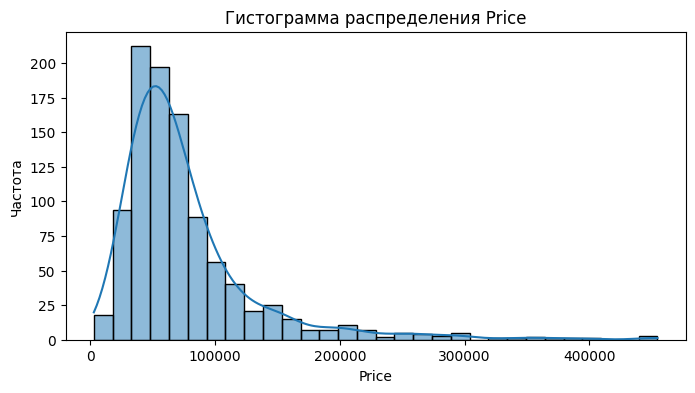

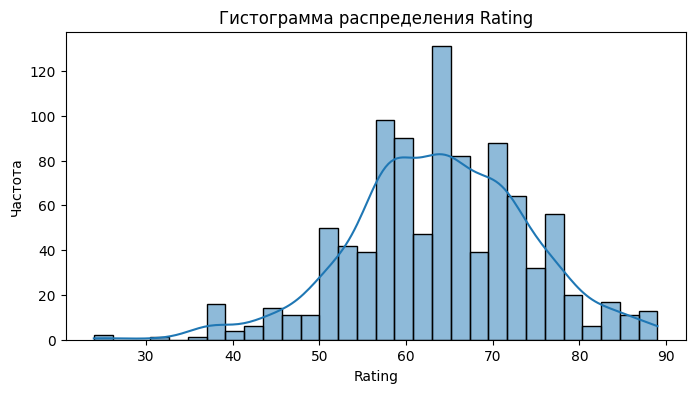

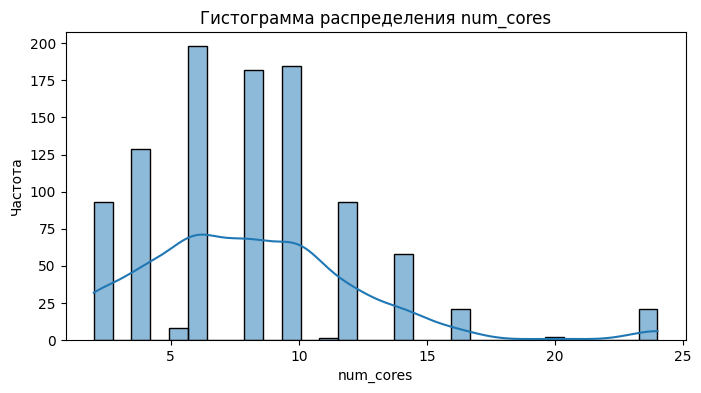

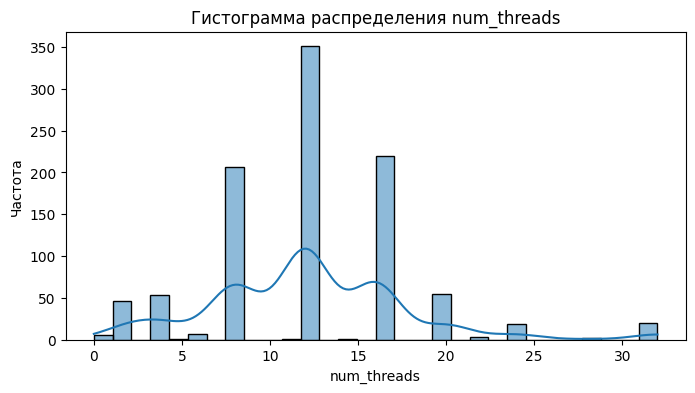

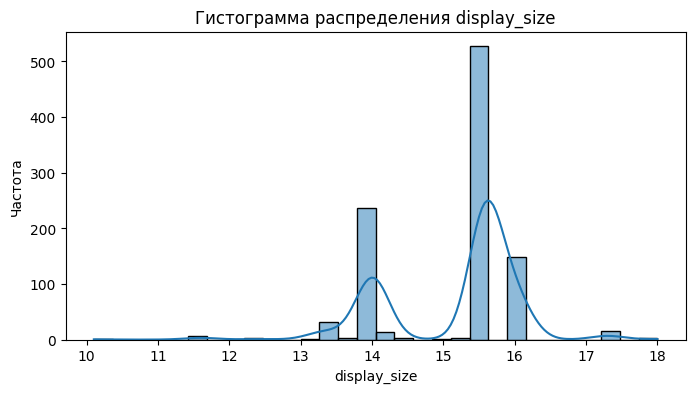

In [17]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

Поиск выбросов с помощью межквартильного размаха (IQR). Это дополнительно позволит понять, насколько выбросы значительны и как их обработать

In [18]:
for col in ['Price', 'Rating']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Количество выбросов в {col}: {len(outliers)}')

Количество выбросов в Price: 70
Количество выбросов в Rating: 19


Визуализация выбросов с использованием PairPlot: Этот график хорошо показывает выбросы в сочетании атрибутов. Он позволяет понять, как связаны параметры друг с другом и с выбросами.

Text(0.5, 1.02, 'Пары атрибутов с KDE')

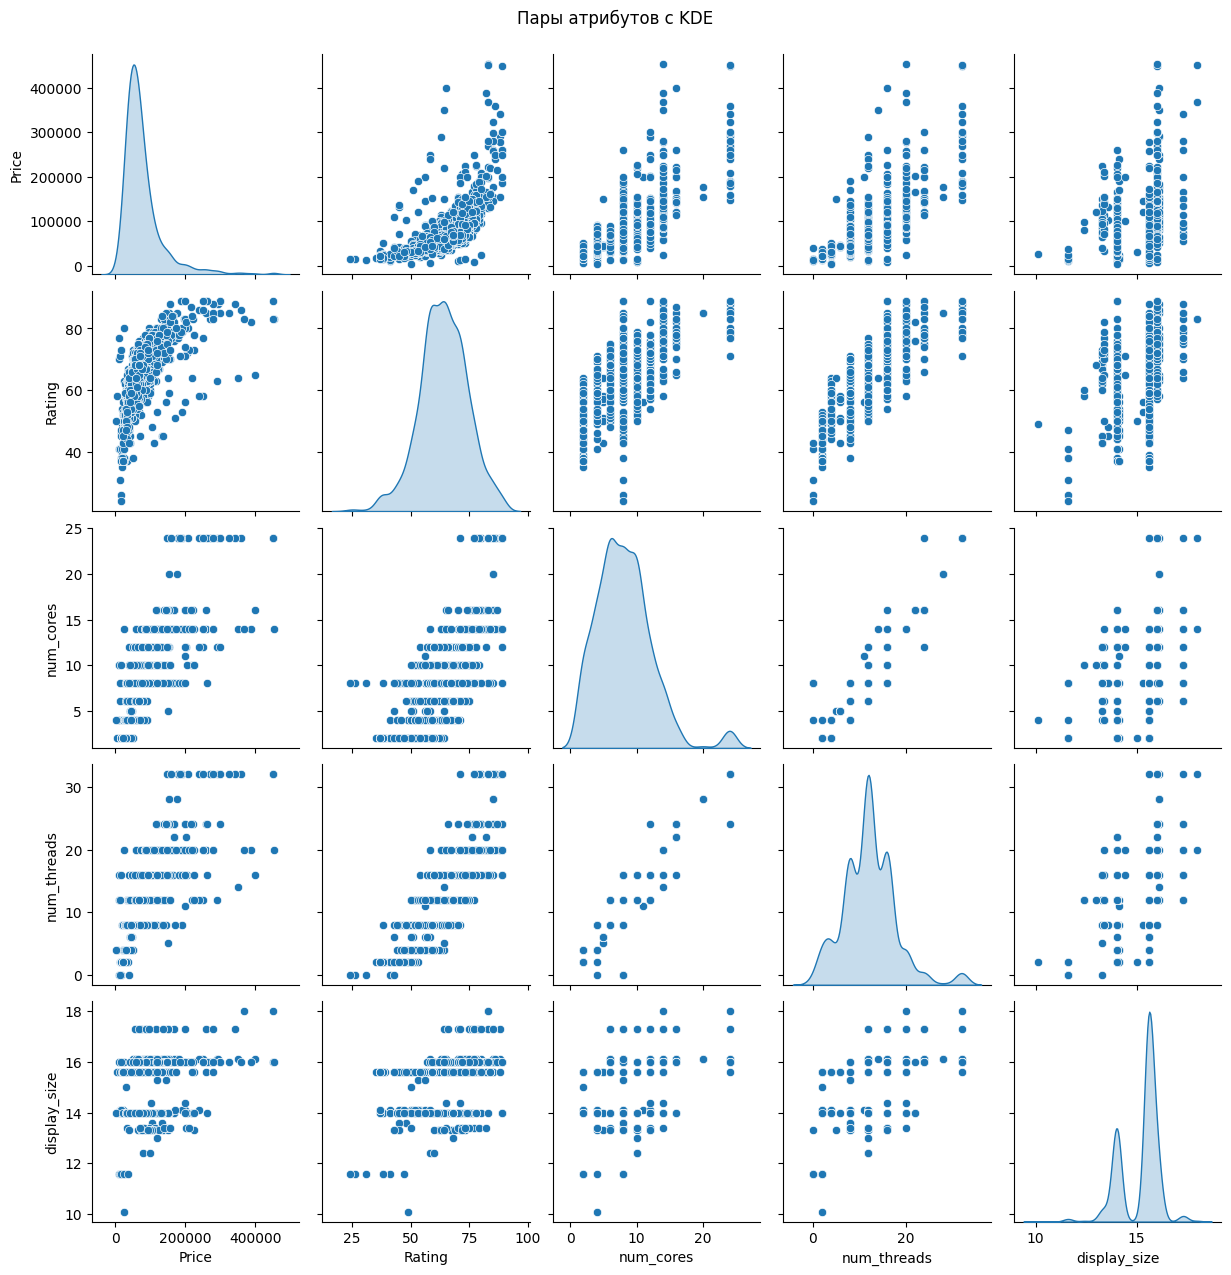

In [19]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Пары атрибутов с KDE", y=1.02)

In [20]:
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)


Пропущенные значения:
 brand              0
Price              0
Rating             0
processor_brand    0
processor_tier     0
num_cores          0
num_threads        0
gpu_brand          0
display_size       0
dtype: int64


Обработка пропущенных значений
Варианты обработки пропущенных значений могут включать:

Заполнение средним значением, медианой или модой.
Удаление строк или столбцов с пропущенными значениями.
Использование методов интерполяции для заполнения пропусков.

In [72]:
print(df.dtypes)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price']= df['Price'].fillna(df['Price'].median(), inplace=True)


brand               object
Price                int64
Rating               int64
processor_brand     object
processor_tier      object
num_cores            int64
num_threads          int64
gpu_brand           object
display_size       float64
price_category      object
cluster              int32
dtype: object


Графики распределения по категориям (например, бренд и цена): Это поможет проанализировать, как цены и другие атрибуты распределяются в разрезе разных категорий.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'tecno'),
  Text(1, 0, 'hp'),
  Text(2, 0, 'acer'),
  Text(3, 0, 'lenovo'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'infinix'),
  Text(6, 0, 'asus'),
  Text(7, 0, 'dell'),
  Text(8, 0, 'samsung'),
  Text(9, 0, 'msi'),
  Text(10, 0, 'wings'),
  Text(11, 0, 'ultimus'),
  Text(12, 0, 'primebook'),
  Text(13, 0, 'iball'),
  Text(14, 0, 'zebronics'),
  Text(15, 0, 'chuwi'),
  Text(16, 0, 'gigabyte'),
  Text(17, 0, 'jio'),
  Text(18, 0, 'honor'),
  Text(19, 0, 'realme'),
  Text(20, 0, 'avita'),
  Text(21, 0, 'microsoft'),
  Text(22, 0, 'fujitsu'),
  Text(23, 0, 'lg'),
  Text(24, 0, 'walker'),
  Text(25, 0, 'axl')])

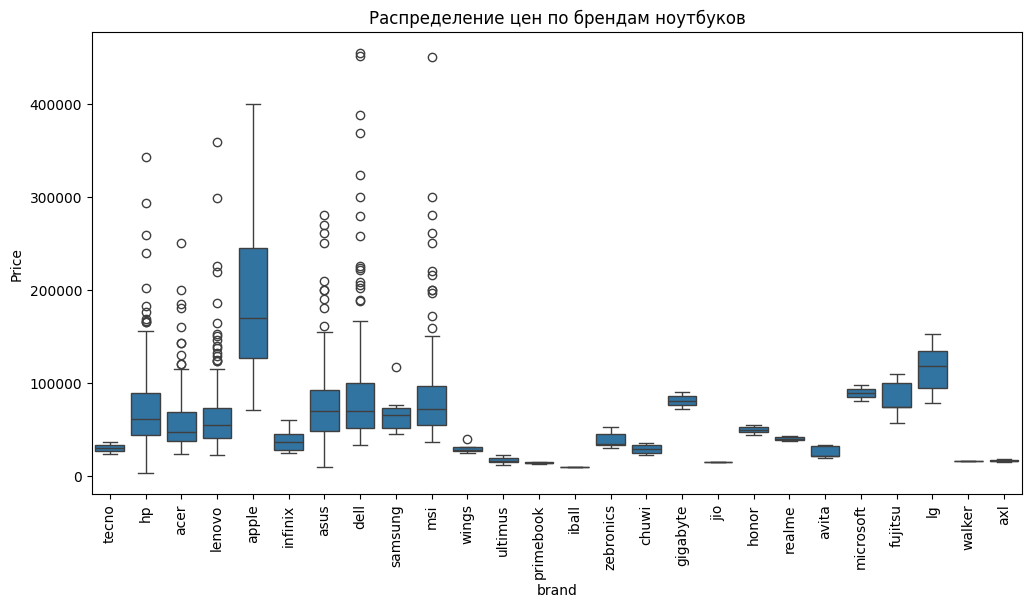

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='Price', data=df)
plt.title("Распределение цен по брендам ноутбуков")
plt.xticks(rotation=90)

Чтобы проанализировать, какие параметры высоко коррелируют между собой, мы используем коэффициент корреляции Пирсона. Он показывает линейную связь между числовыми атрибутами: значения, близкие к ±1, указывают на сильную корреляцию, а значения около 0 указывают на слабую или отсутствующую корреляцию.

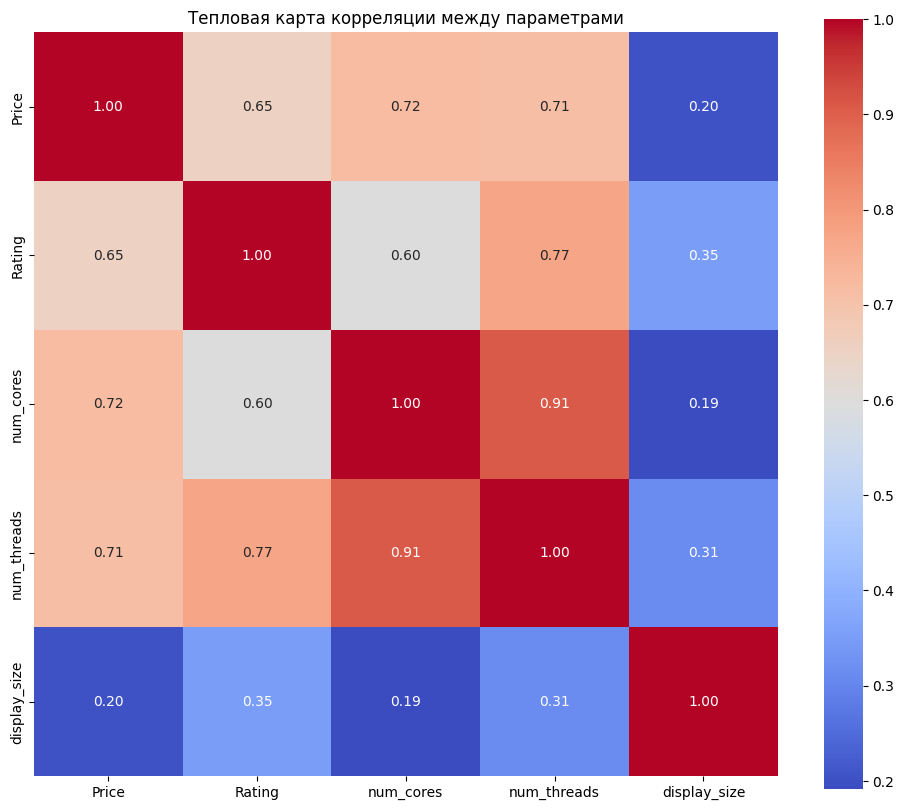

In [26]:
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Тепловая карта корреляции между параметрами")
plt.show()

Теперь выделим атрибуты с высокой корреляцией (например, |корреляция| > 0.7) и атрибуты, где корреляция практически отсутствует (|корреляция| < 0.1)

In [27]:
high_corr_threshold = 0.7
high_corr_pairs = []

for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        if i != j and abs(correlation_matrix.loc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((i, j, correlation_matrix.loc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Attribute 1', 'Attribute 2', 'Correlation'])
print("Высококоррелированные пары атрибутов:")
display(high_corr_df)

Высококоррелированные пары атрибутов:


,Attribute 1,Attribute 2,Correlation
0,Price,num_cores,0.719673
1,Price,num_threads,0.713888
2,Rating,num_threads,0.773804
3,num_cores,Price,0.719673
4,num_cores,num_threads,0.907461
5,num_threads,Price,0.713888
6,num_threads,Rating,0.773804
7,num_threads,num_cores,0.907461


Для каждой найденной пары можно построить график рассеивания

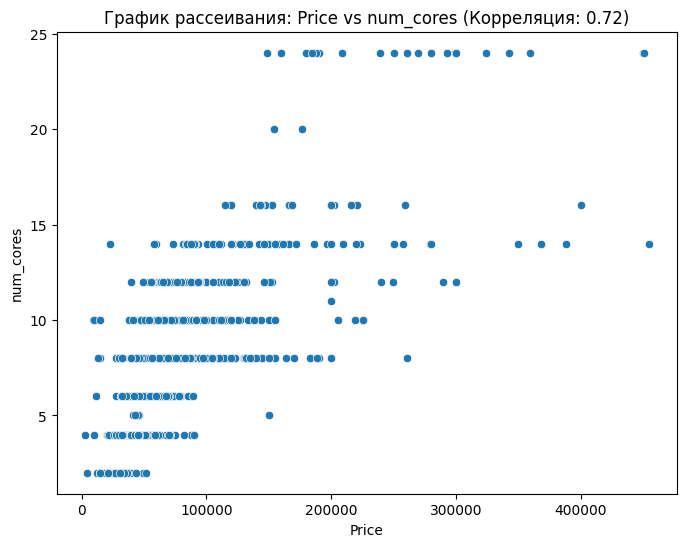

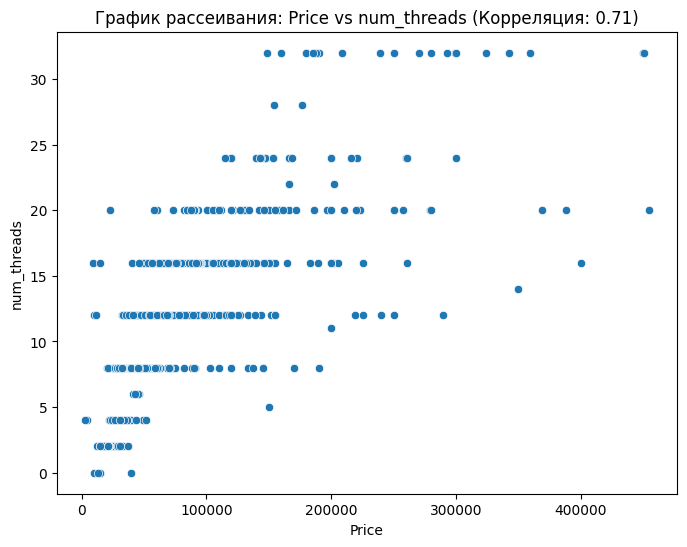

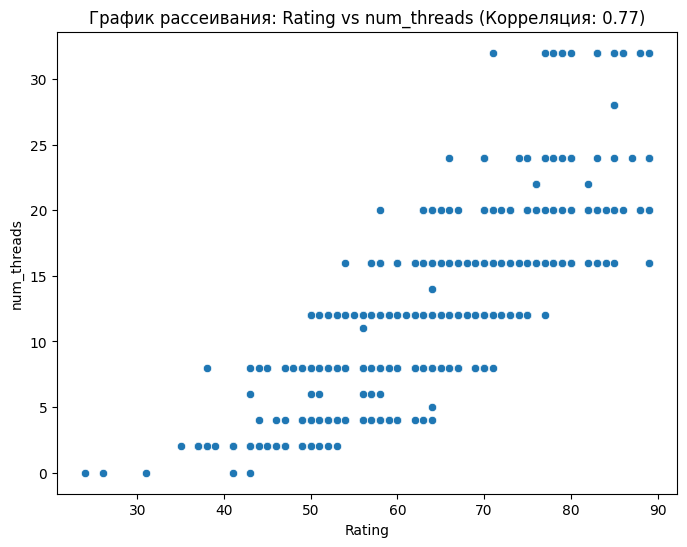

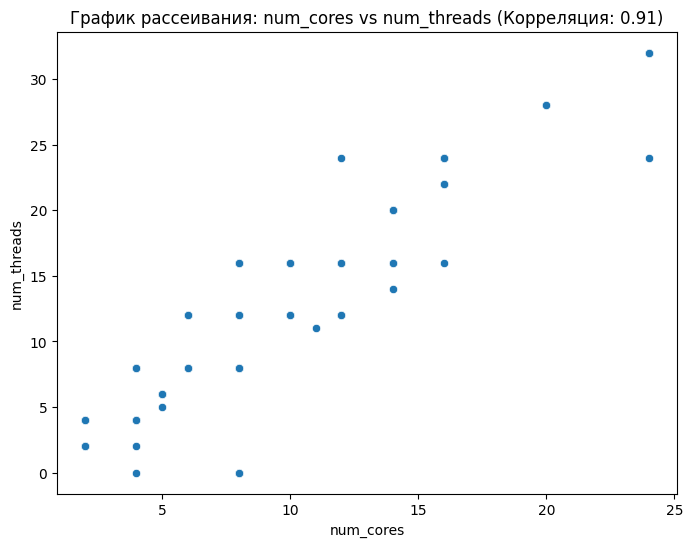

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('laptops.csv')

numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > 0.7) & (high_corr_pairs['Attribute 1'] != high_corr_pairs['Attribute 2'])]

high_corr_pairs['Ordered Pair'] = high_corr_pairs.apply(lambda x: tuple(sorted([x['Attribute 1'], x['Attribute 2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Ordered Pair']).drop(columns=['Ordered Pair'])

for index, row in high_corr_pairs.iterrows():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=row['Attribute 1'], y=row['Attribute 2'])
    plt.title(f"График рассеивания: {row['Attribute 1']} vs {row['Attribute 2']} (Корреляция: {row['Correlation']:.2f})")
    plt.xlabel(row['Attribute 1'])
    plt.ylabel(row['Attribute 2'])
    plt.show()

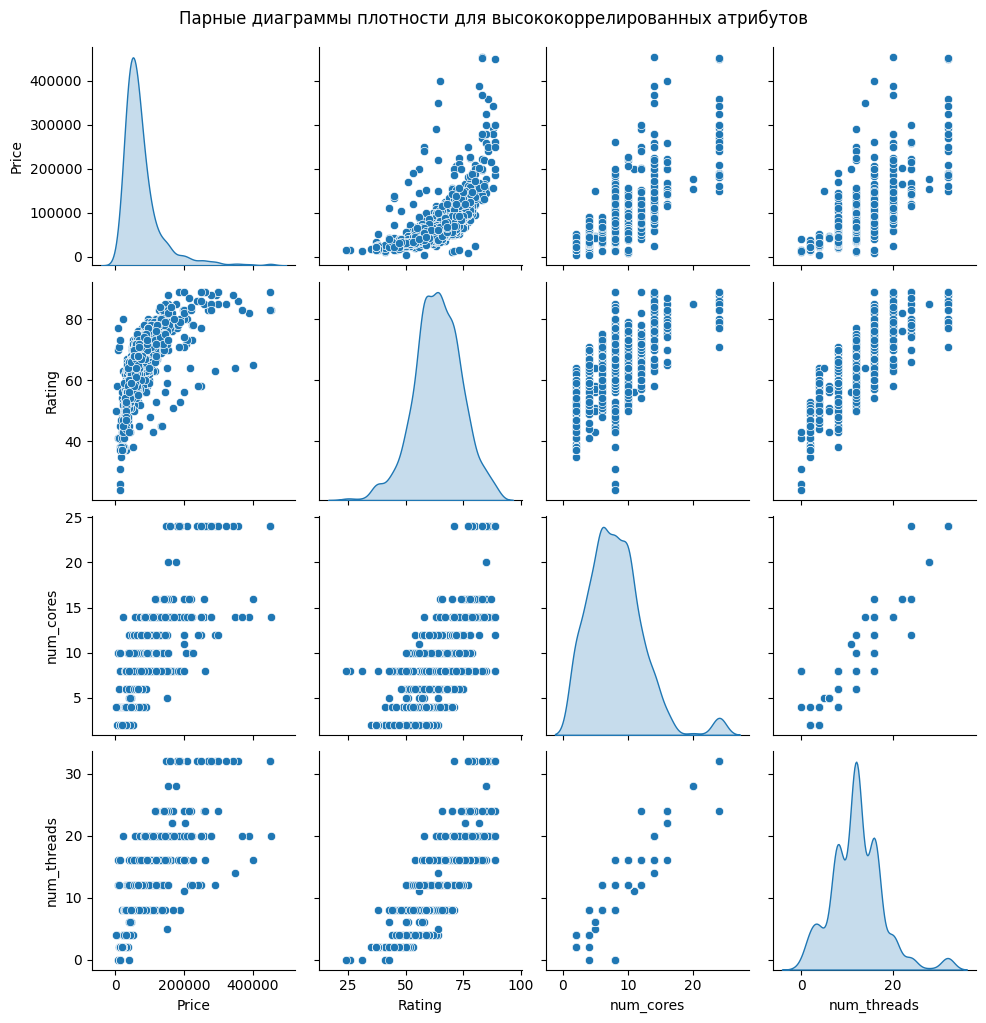

In [30]:
sns.pairplot(numeric_df, vars=high_corr_df['Attribute 1'].unique(), diag_kind='kde')
plt.suptitle("Парные диаграммы плотности для высококоррелированных атрибутов", y=1.02)
plt.show()

Чтобы глубже понять взаимосвязи, создадим матрицу графиков рассеивания (scatter matrix), которая позволяет визуально оценить зависимость между парами переменных.


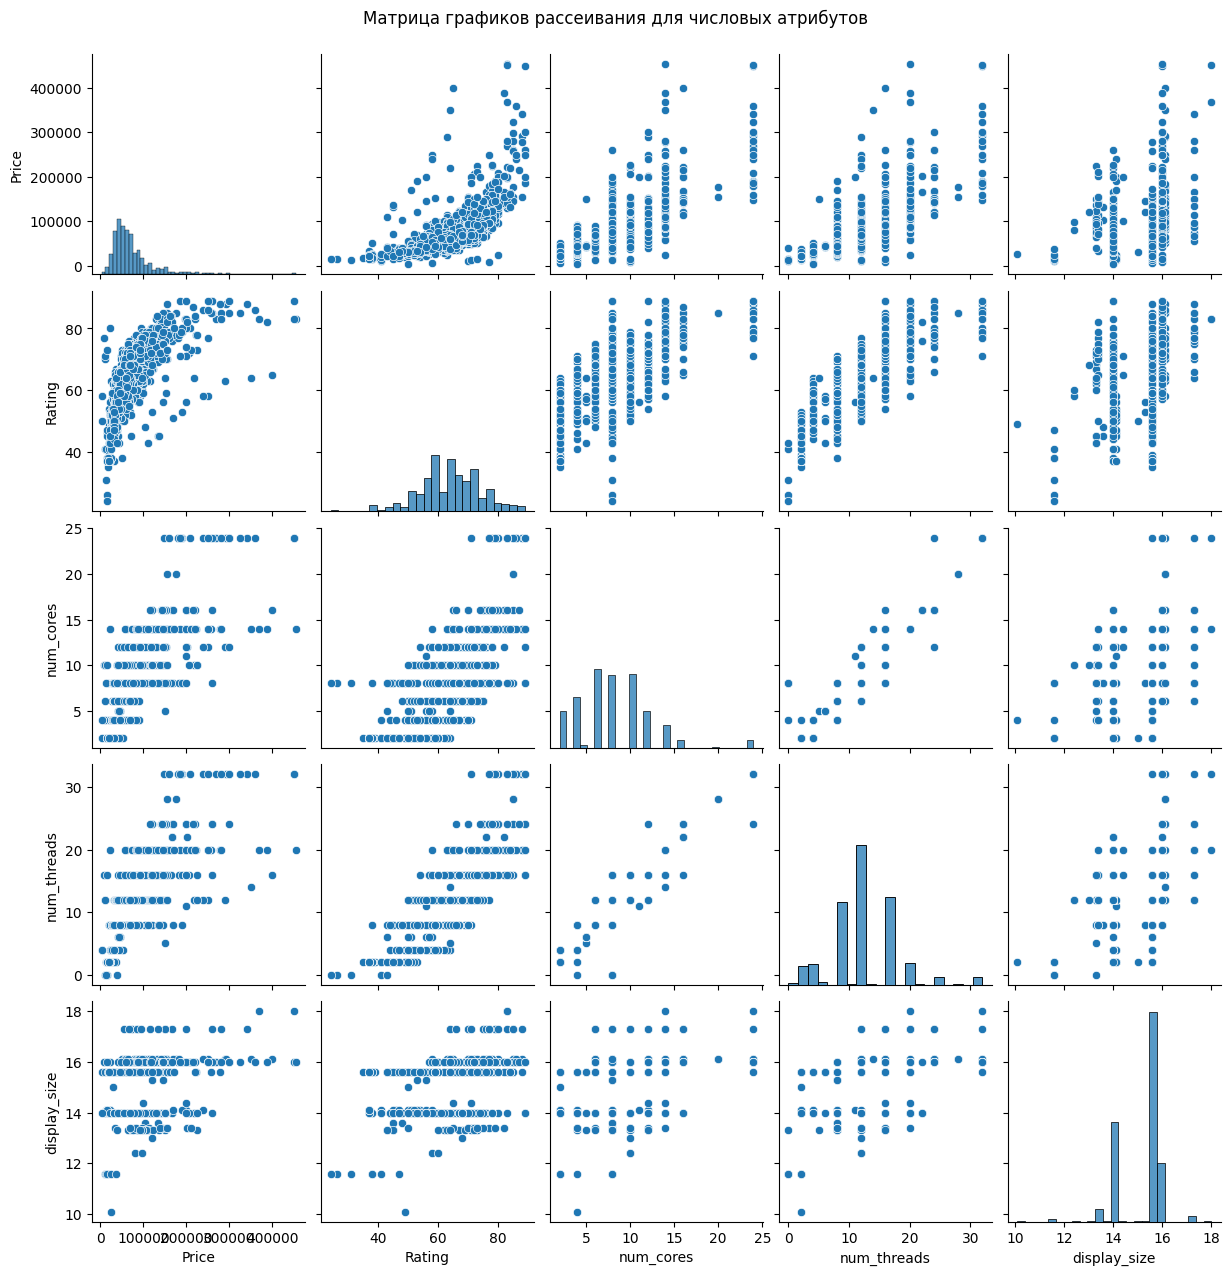

In [31]:
import seaborn as sns
sns.pairplot(numeric_df)
plt.suptitle("Матрица графиков рассеивания для числовых атрибутов", y=1.02)
plt.show()

Диаграммы Бокса для выявления выбросов по каждому числовому атрибуту

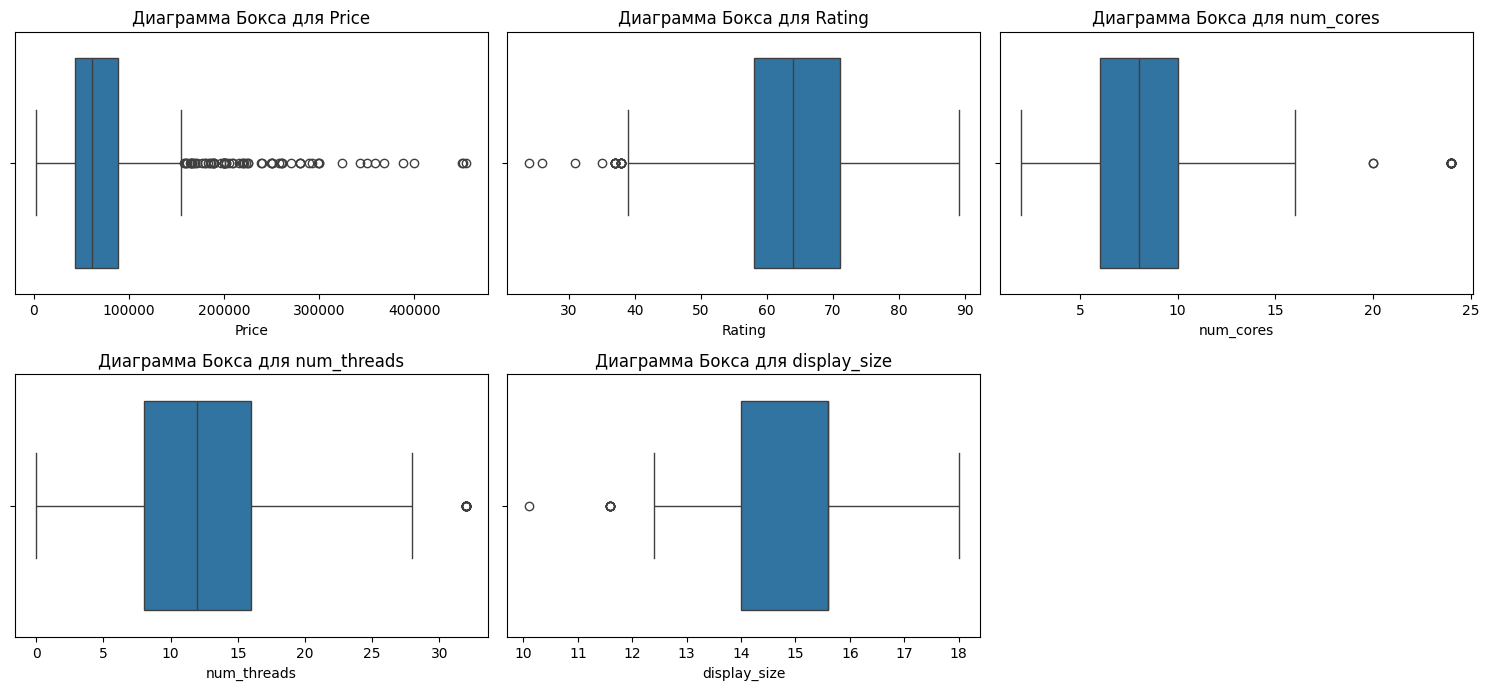

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=numeric_df[col])
    plt.title(f"Диаграмма Бокса для {col}")
plt.tight_layout()
plt.show()

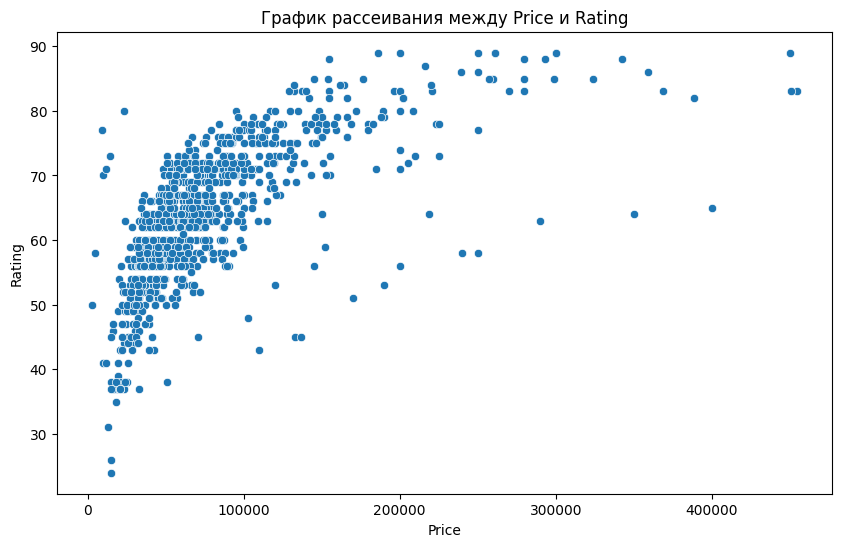

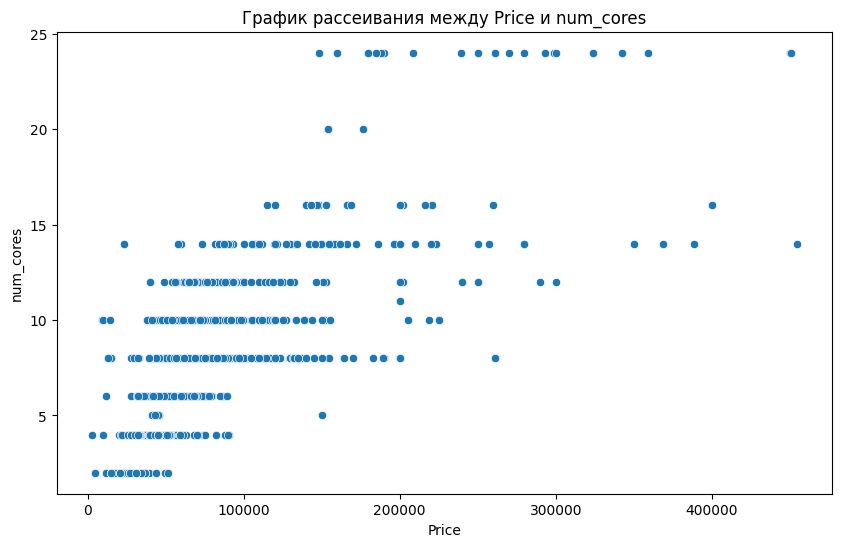

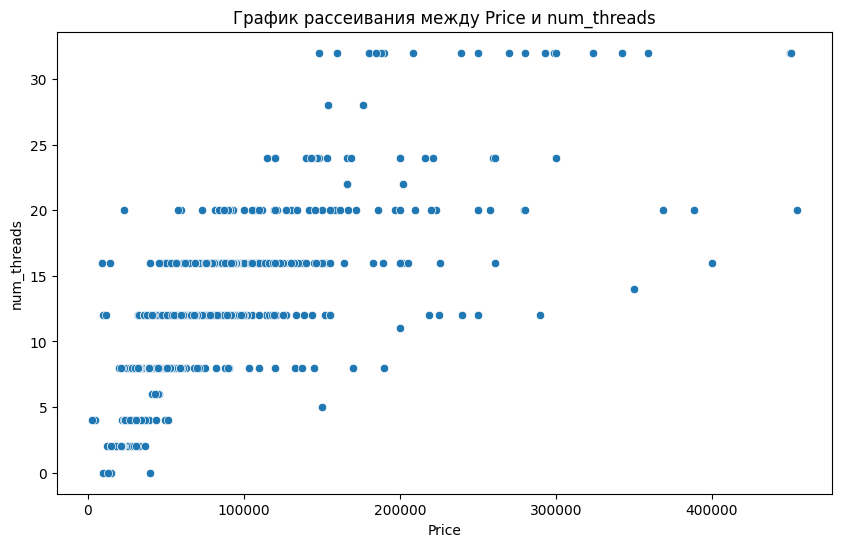

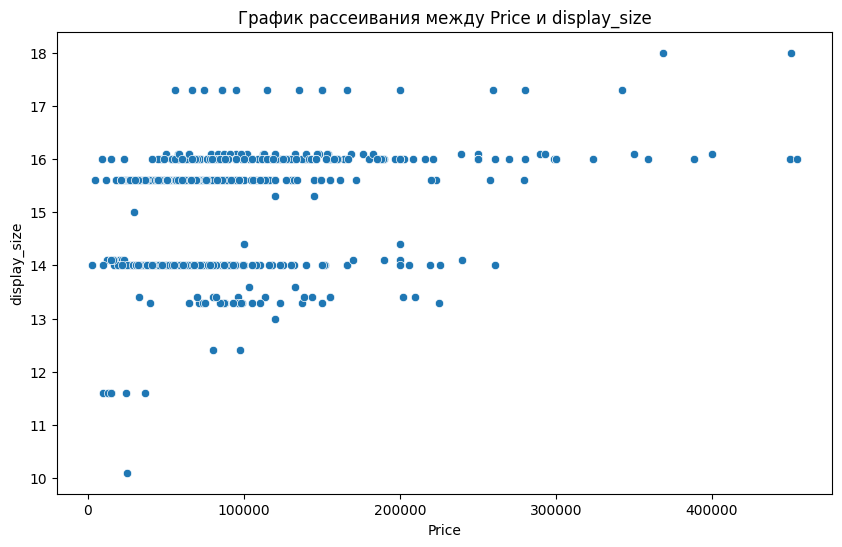

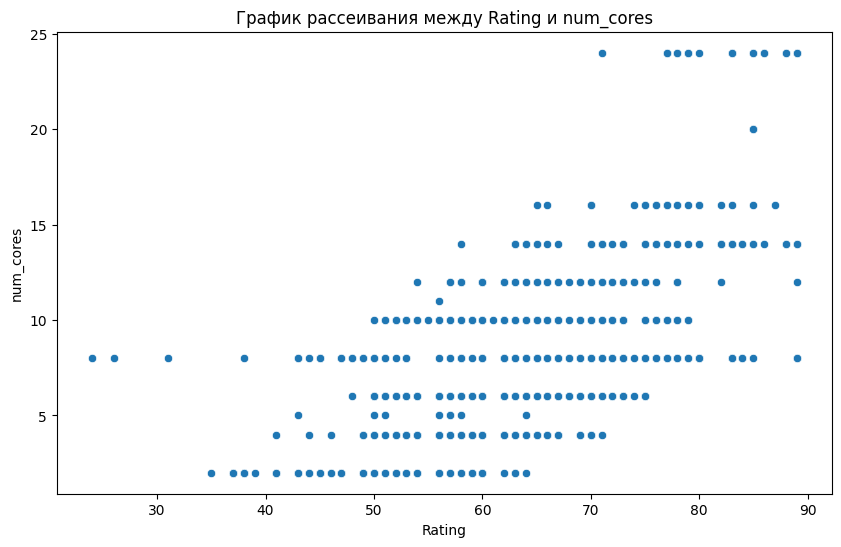

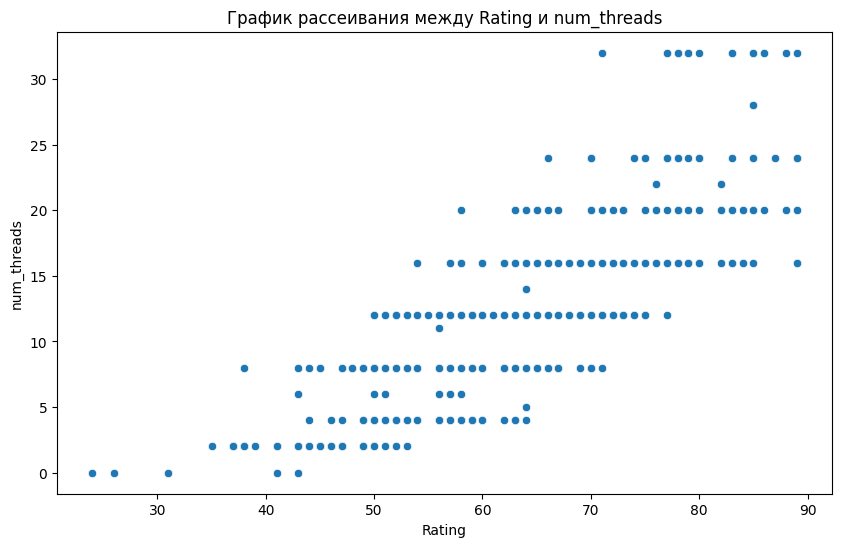

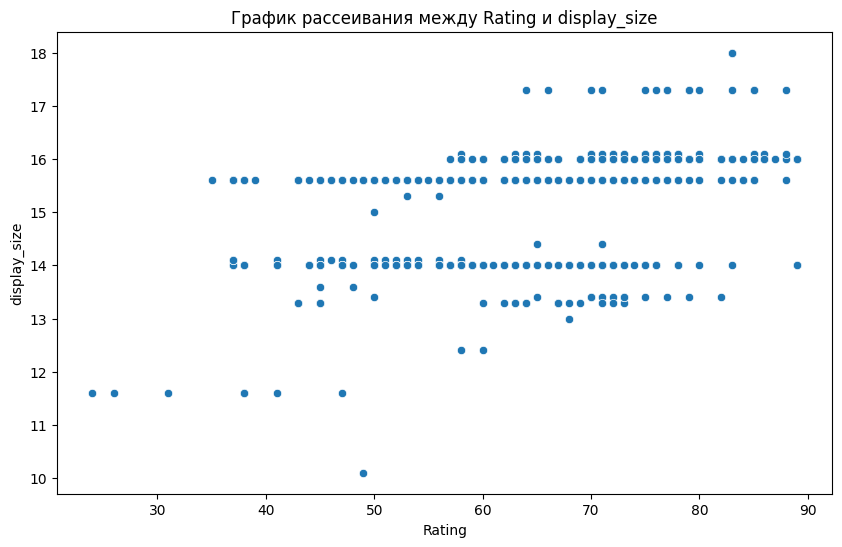

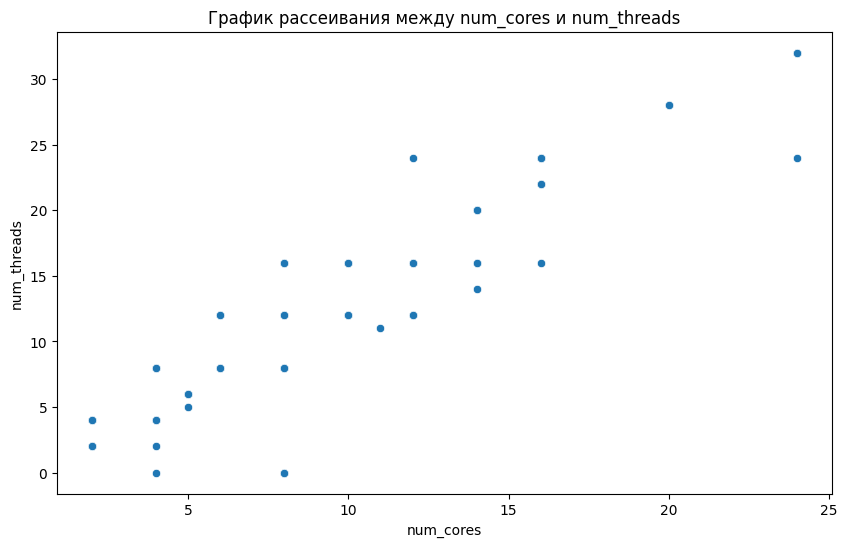

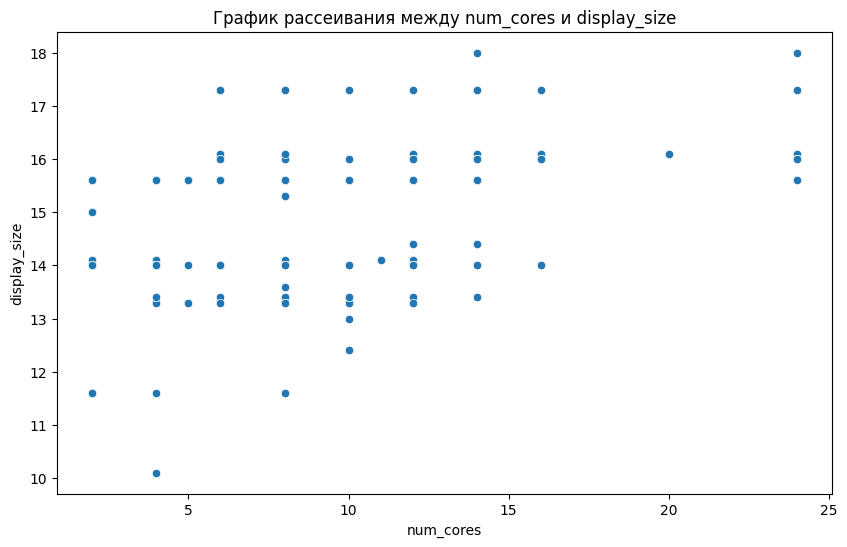

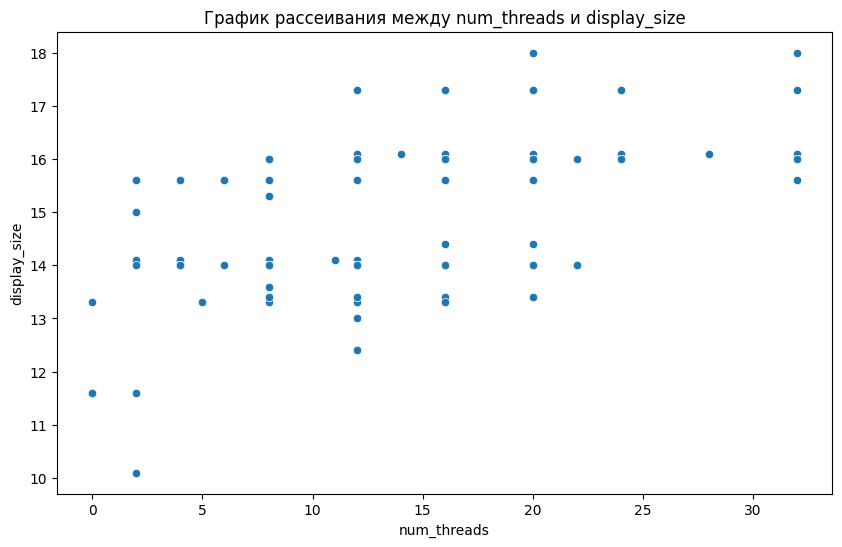

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('laptops.csv')

num_cols = data.select_dtypes(include=[np.number]).columns

for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=num_cols[i], y=num_cols[j])
        plt.title(f'График рассеивания между {num_cols[i]} и {num_cols[j]}')
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.show()

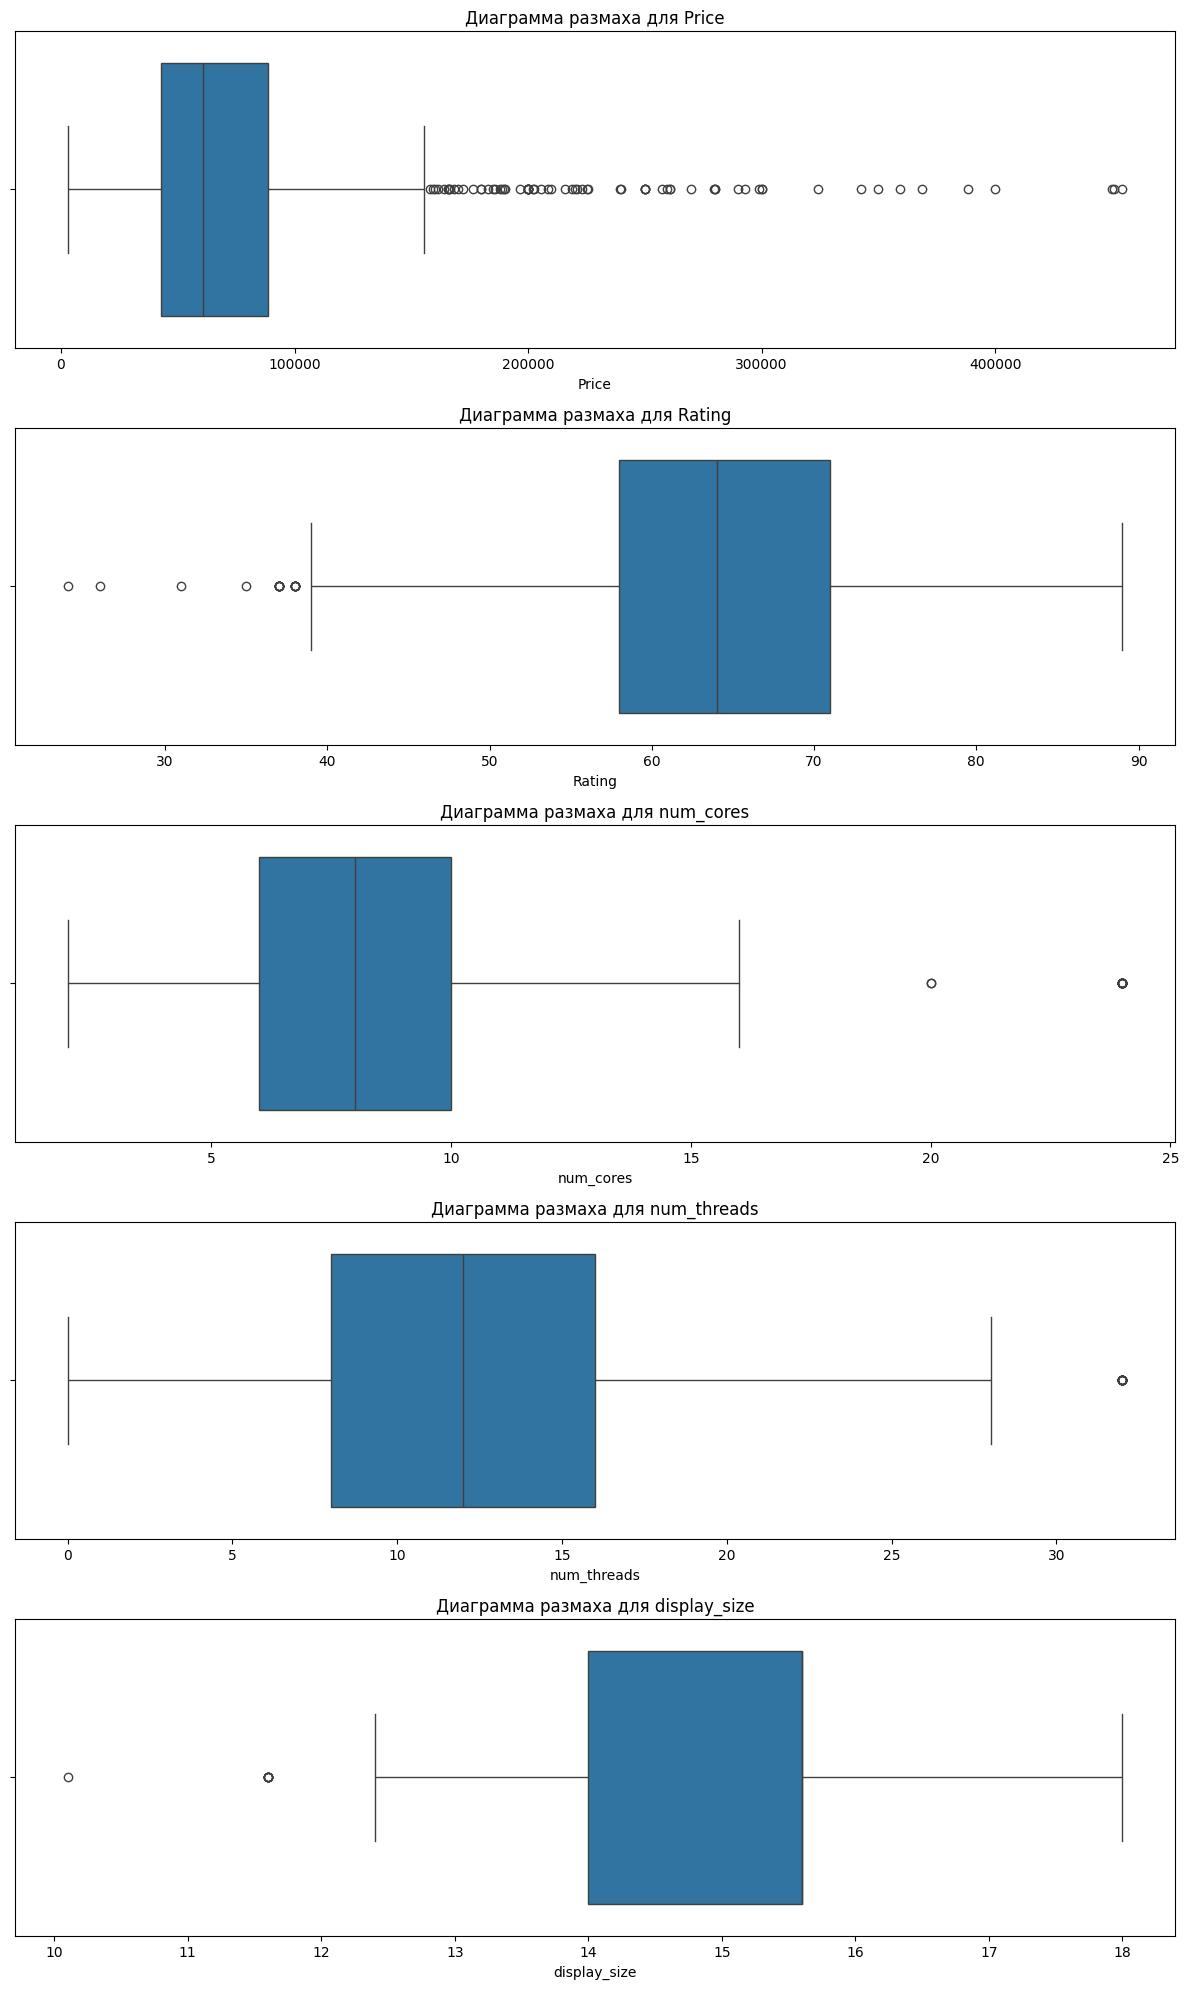

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, len(num_cols) * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(data=data, x=col)
    plt.title(f'Диаграмма размаха для {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# **ЛАБОРАТОРНАЯ РАБОТА №2**
**Цель** - познакомиться с методом кластеризации K-mean с помощью пакета sklearn.

№1

In [68]:
def categorize_price(price):
    if price < 20000:
        return 'low'
    elif 20000 <= price < 40000:
        return 'medium'
    else:
        return 'high'

df['price_category'] = df['Price'].apply(categorize_price)

print(df[['Price', 'price_category']].head())

print("Распределение по категориям цен:")
print(df['price_category'].value_counts())


   Price price_category
0  23990         medium
1  35990         medium
2  51100           high
3  39990         medium
4  28580         medium
Распределение по категориям цен:
price_category
high      695
medium    181
low        14
Name: count, dtype: int64


№2

Удаление дубликатов
Чтобы исключить повторяющиеся записи, можно использовать метод drop_duplicates.

In [69]:
df.drop_duplicates(inplace=True)
print("Количество записей после удаления дубликатов:", len(df))

Количество записей после удаления дубликатов: 890


Обработка пропущенных значений
Для обработки пропущенных значений можно заполнить их медианой или средним значением, либо удалить строки с пропусками, если их немного.

In [67]:
print("Пропущенные значения в каждом столбце:")
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

Пропущенные значения в каждом столбце:
brand              0
Price              0
Rating             0
processor_brand    0
processor_tier     0
num_cores          0
num_threads        0
gpu_brand          0
display_size       0
price_category     0
cluster            0
dtype: int64


Удаление выбросов
Чтобы удалить выбросы, можно использовать метод межквартильного размаха (IQR). Этот метод подходит для числовых данных и помогает удалить записи, которые выходят за рамки нормального диапазона.

In [38]:
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

df = df[~((df.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) |
          (df.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Количество записей после удаления выбросов:", len(df))

Количество записей после удаления выбросов: 890


Поиск и исправление аномалий или "кривых" данных
Проверим данные на наличие необычных значений, которые могут свидетельствовать о вводе ошибок или аномалиях. Например, отрицательные значения в рейтинга (Rating) или цене (Price) могут быть ошибочными.

In [41]:

for column in ['Price', 'Rating']:
    if (df[column] < 0).any():
        print(f"Есть отрицательные значения в столбце '{column}'")

        df[column] = df[column].apply(lambda x: x if x >= 0 else None)
        df[column].fillna(df[column].median(), inplace=True)

Проверка данных после очистки
Чтобы удостовериться, что данные «причесаны», полезно еще раз проверить, что дубликаты, выбросы и пропуски были обработаны.

In [42]:

print("Пропущенные значения после очистки:")
print(df.isnull().sum())

print("Количество записей после полной очистки:", len(df))

Пропущенные значения после очистки:
brand              0
Price              0
Rating             0
processor_brand    0
processor_tier     0
num_cores          0
num_threads        0
gpu_brand          0
display_size       0
price_category     0
dtype: int64
Количество записей после полной очистки: 890


№3


Для визуализации данных и выявления потенциальных кластеров можно использовать графики рассеяния (plt.scatter), сравнивая пары переменных. Например, для анализа цен на ноутбуки можно использовать такие переменные, как Price и Rating, или num_cores и Price, чтобы увидеть закономерности и выделить группы.

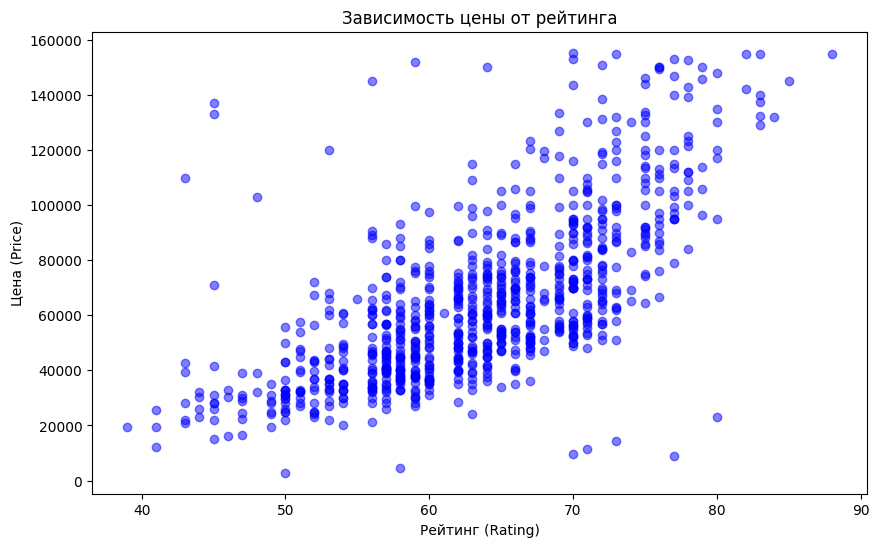

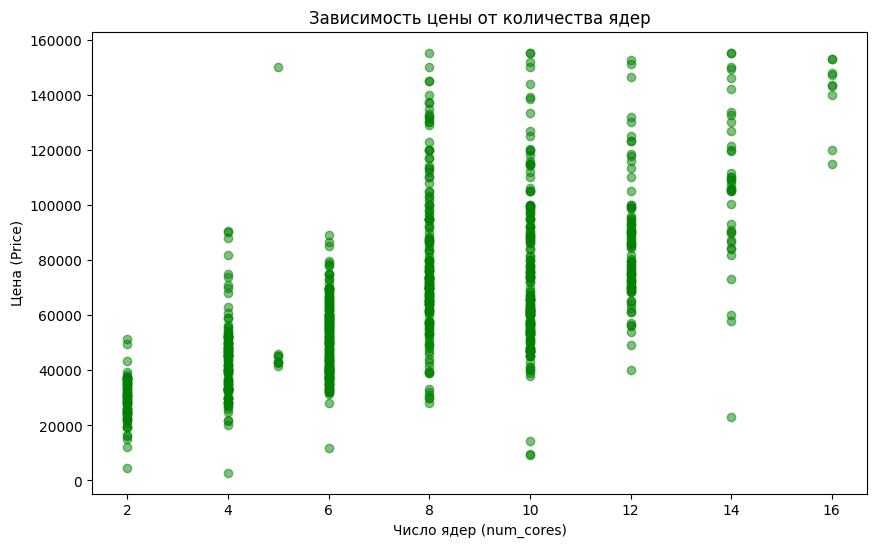

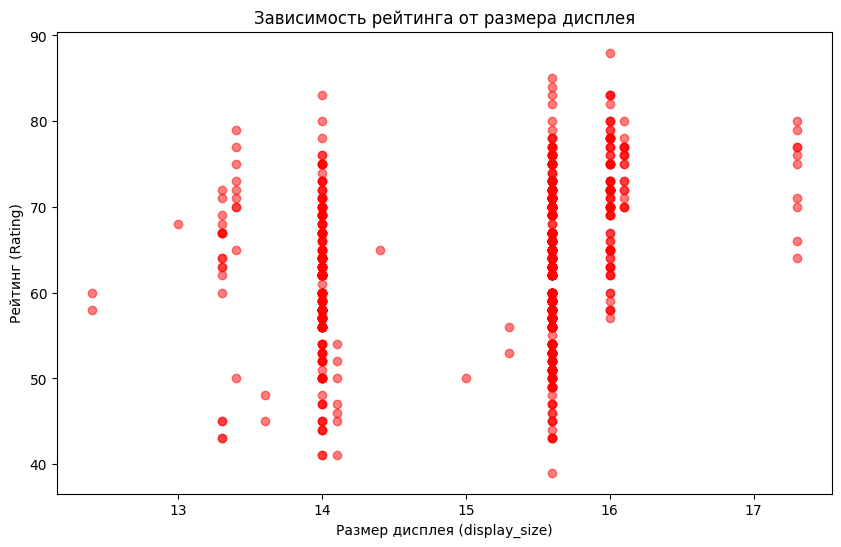

In [45]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Price'], alpha=0.5, c='blue')
plt.title('Зависимость цены от рейтинга')
plt.xlabel('Рейтинг (Rating)')
plt.ylabel('Цена (Price)')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df['num_cores'], df['Price'], alpha=0.5, c='green')
plt.title('Зависимость цены от количества ядер')
plt.xlabel('Число ядер (num_cores)')
plt.ylabel('Цена (Price)')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df['display_size'], df['Rating'], alpha=0.5, c='red')
plt.title('Зависимость рейтинга от размера дисплея')
plt.xlabel('Размер дисплея (display_size)')
plt.ylabel('Рейтинг (Rating)')
plt.show()

Описание видимых кластеров

Зависимость цены от рейтинга: На этом графике можно увидеть, что ноутбуки с низким рейтингом обычно имеют более низкую цену. Здесь часто выделяются несколько кластеров: ноутбуки с низким рейтингом и низкой ценой, и ноутбуки с высоким рейтингом и высокой ценой.

Зависимость цены от числа ядер На этом графике можно увидеть, что ноутбуки с большим числом ядер имеют более высокую цену. Могут быть кластеры ноутбуков с низкой ценой и ноутбуков с высокой ценой.

Зависимость размера дисплея от рейтинга: Здесь могут выделяться группы ноутбуков с маленьким размером дисплея и высоким рейтингом, а также с большим дисплеем с высоким рейтингом.

№4

Для кластеризации в этом случае будем использовать метод KMeans из библиотеки sklearn. Перед тем как применить кластеризацию, важно выбрать и нормализовать нужные признаки, такие как Price, Rating, и num_cores. Нормализация улучшает результаты кластеризации, особенно если признаки находятся в разных единицах измерения.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = df[['Price', 'Rating', 'num_cores']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Выбор числа кластеров с помощью метода "локтя"
Метод локтя позволяет определить оптимальное количество кластеров, при котором кривая зависимости суммы квадратов расстояний внутри кластеров (inertia) от числа кластеров начинает выравниваться.

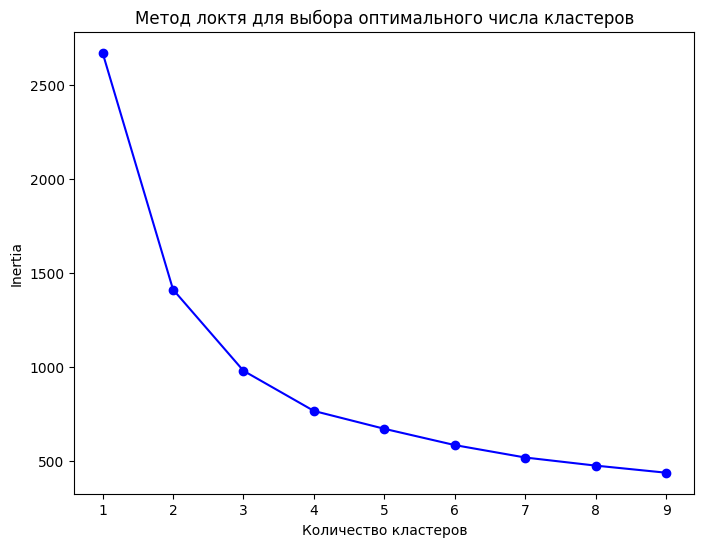

In [47]:

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора оптимального числа кластеров')
plt.show()

После выбора оптимального количества кластеров применим алгоритм KMeans.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)


df.loc[:, 'cluster'] = kmeans.fit_predict(scaled_features)


Визуализация результатов
Теперь, когда кластеры определены, визуализируем их на графиках рассеяния.

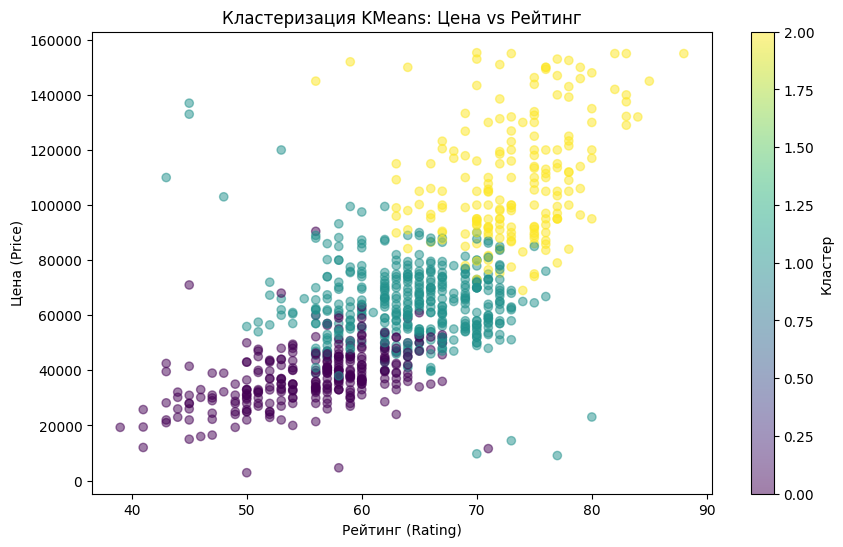

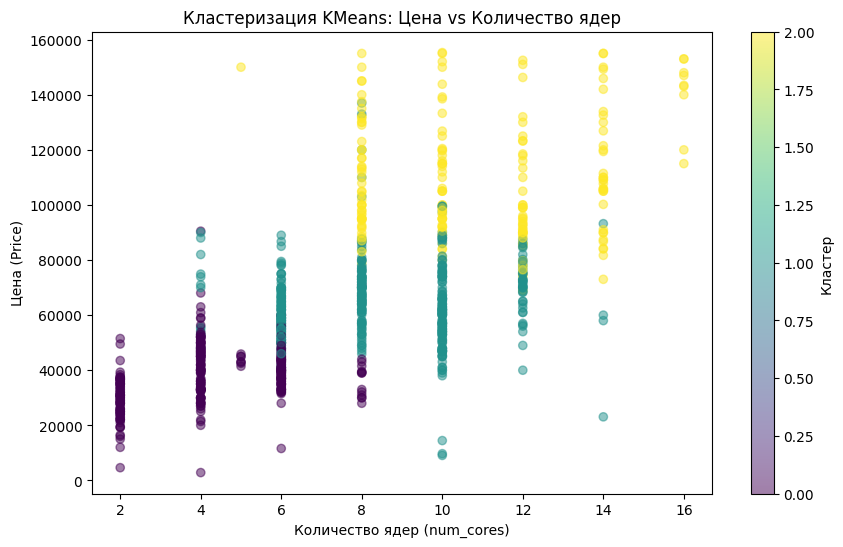

In [51]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Price'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Кластеризация KMeans: Цена vs Рейтинг')
plt.xlabel('Рейтинг (Rating)')
plt.ylabel('Цена (Price)')
plt.colorbar(label='Кластер')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df['num_cores'], df['Price'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Кластеризация KMeans: Цена vs Количество ядер')
plt.xlabel('Количество ядер (num_cores)')
plt.ylabel('Цена (Price)')
plt.colorbar(label='Кластер')
plt.show()

Выводы
Добавление нового атрибута: В ходе работы с датасетом был добавлен новый атрибут, который классифицирует ноутбуки по трем уровням: "low", "medium" и "high". Этот атрибут помогает лучше понять распределение данных и улучшить анализ по ценовым сегментам.

Причесывание датасета: Были выполнены следующие операции по очистке данных:

Удаление выбросов: применен метод межквартильного размаха (IQR), который помогает устранить аномальные значения и делает данные более устойчивыми к экстремальным значениям.
Обработка пропущенных значений: пропущенные данные были либо удалены, либо заменены на соответствующие медианные значения, что позволяет минимизировать потери информации.
Удаление дублирующихся строк: все дублирующиеся записи были удалены, чтобы избежать искажения результатов анализа.
Анализ зависимости переменных: Построены графики зависимости различных переменных (например, цена, рейтинг) друг от друга. На основе этих графиков были выявлены различные кластеры, например, ноутбуки с низким рейтингрм и высокой ценой, а также те, которые имеют высокую цену и низкий рейтинг. Такие визуализации помогают лучше понять структуры в данных и выделить основные группы.

Применение метода кластеризации KMeans: Метод KMeans был успешно применен для кластеризации ноутбуков по признакам: цена, рейтинг, число ядер. Результаты кластеризации показали наличие трех очевидных групп, что подтверждается методом локтя (график инерции). На основе кластеров можно выделить ноутбуки, подходящие для разных типов покупателей, что дает ценную информацию для сегментации рынка.

Выбор оптимального количества кластеров: Использование метода локтя позволило выбрать оптимальное количество кластеров для модели KMeans. График инерции показал, что оптимальным числом кластеров является 3, что позволяет выделить три различные группы ноутбуков с различными характеристиками.

В целом, проведенная работа позволила провести углубленный анализ данных, выделить важные закономерности и построить модель, которая помогает понять структуру данных и предложить решения для дальнейшего анализа.

# **Лабораторная работа №3**
**Цель** - Исследовать алгориты классификации

Шаг 1: Определение целевого класса
Целевым классом выбран атрибут price, который был разделен на три категории с использованием квантилей:

Low: ноутбуки с низкой ценой.

Medium: ноутбуки со средней ценой.

High: ноутбуки с высокой ценой.

Разделение данных на категории позволяет трансформировать задачу в задачу классификации. Распределение классов было проверено, чтобы убедиться в сбалансированности:

In [52]:

data['price_category'] = pd.qcut(data['Price'], q=3, labels=['Low', 'Medium', 'High'])


print(data['price_category'].value_counts(normalize=True) * 100)


price_category
Low       33.501514
High      33.400605
Medium    33.097881
Name: proportion, dtype: float64


Вывод показал, что классы достаточно сбалансированы, чтобы использовать алгоритмы классификации.

In [53]:
from sklearn.model_selection import train_test_split


X = data[['num_cores', 'Rating', 'num_threads', 'display_size', 'Rating']]


y = data['price_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Размеры выборок: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print("Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))


Размеры выборок: X_train: (693, 5), X_test: (298, 5), y_train: (693,), y_test: (298,)
Распределение классов в обучающей выборке:
price_category
Medium    0.343434
Low       0.330447
High      0.326118
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
price_category
High      0.352349
Low       0.345638
Medium    0.302013
Name: proportion, dtype: float64


Описание задачи:

Целью исследования является сравнение двух алгоритмов классификации: k-ближайших соседей (kNN) и дерева решений. Для этого был выбран датасет, содержащий информацию о характеристиках ноутбуков, включая такие атрибуты, как число ядер, рейтинг, число потоков, размер дисплея.

Прогнозы для первых 10 объектов тестовой выборки:
['Low' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'High' 'Medium' 'Medium']
Точность модели kNN: 0.75


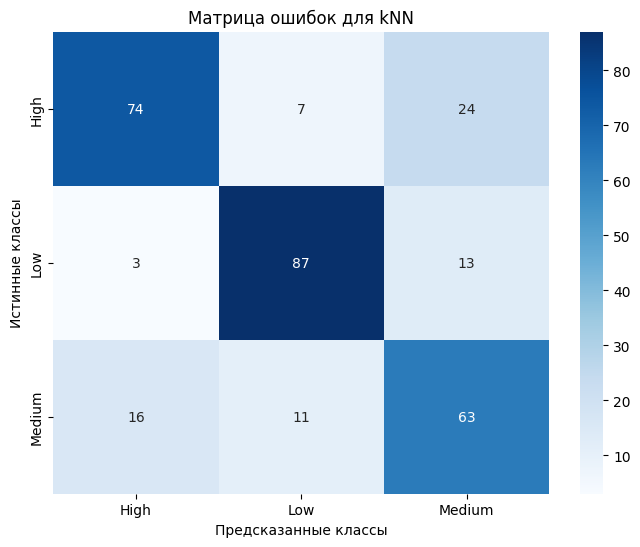

Классификационный отчет:
              precision    recall  f1-score   support

        High       0.80      0.70      0.75       105
         Low       0.83      0.84      0.84       103
      Medium       0.63      0.70      0.66        90

    accuracy                           0.75       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.76      0.75      0.75       298



In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


X = data[['num_cores', 'Rating', 'num_threads', 'display_size', 'Rating']]
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


knn_predictions = knn.predict(X_test)


print("Прогнозы для первых 10 объектов тестовой выборки:")
print(knn_predictions[:10])


accuracy = accuracy_score(y_test, knn_predictions)
print(f"Точность модели kNN: {accuracy:.2f}")


cm = confusion_matrix(y_test, knn_predictions, labels=knn.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок для kNN')
plt.show()


print("Классификационный отчет:")
print(classification_report(y_test, knn_predictions))

Прогнозы для первых 10 объектов тестовой выборки (дерево решений):
['Low' 'Low' 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'High' 'High' 'Low']
Точность модели дерева решений: 0.71


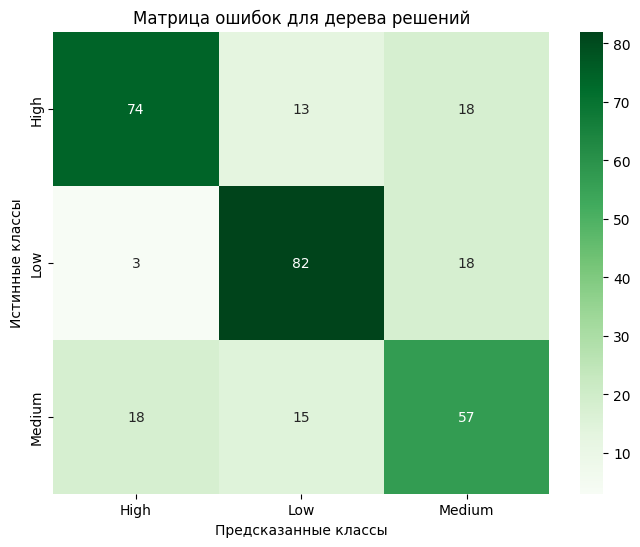

Классификационный отчет (дерево решений):
              precision    recall  f1-score   support

        High       0.78      0.70      0.74       105
         Low       0.75      0.80      0.77       103
      Medium       0.61      0.63      0.62        90

    accuracy                           0.71       298
   macro avg       0.71      0.71      0.71       298
weighted avg       0.72      0.71      0.72       298



In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


dt = DecisionTreeClassifier(random_state=42)


dt.fit(X_train, y_train)


dt_predictions = dt.predict(X_test)


print("Прогнозы для первых 10 объектов тестовой выборки (дерево решений):")
print(dt_predictions[:10])


accuracy_dt = accuracy_score(y_test, dt_predictions)
print(f"Точность модели дерева решений: {accuracy_dt:.2f}")


cm_dt = confusion_matrix(y_test, dt_predictions, labels=dt.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок для дерева решений')
plt.show()


print("Классификационный отчет (дерево решений):")
print(classification_report(y_test, dt_predictions))

In [56]:
from sklearn.metrics import accuracy_score


knn_accuracy = accuracy_score(y_test, knn_predictions)


dt_accuracy = accuracy_score(y_test, dt_predictions)


print(f"kNN Accuracy: {knn_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


kNN Accuracy: 0.75
Decision Tree Accuracy: 0.71


In [57]:
from sklearn.metrics import classification_report


print("kNN Report:\n", classification_report(y_test, knn_predictions))


print("Decision Tree Report:\n", classification_report(y_test, dt_predictions))

kNN Report:
               precision    recall  f1-score   support

        High       0.80      0.70      0.75       105
         Low       0.83      0.84      0.84       103
      Medium       0.63      0.70      0.66        90

    accuracy                           0.75       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.76      0.75      0.75       298

Decision Tree Report:
               precision    recall  f1-score   support

        High       0.78      0.70      0.74       105
         Low       0.75      0.80      0.77       103
      Medium       0.61      0.63      0.62        90

    accuracy                           0.71       298
   macro avg       0.71      0.71      0.71       298
weighted avg       0.72      0.71      0.72       298



kNN ROC AUC Score: 0.3085982596776022
Decision Tree ROC AUC Score: 0.32298532955884934


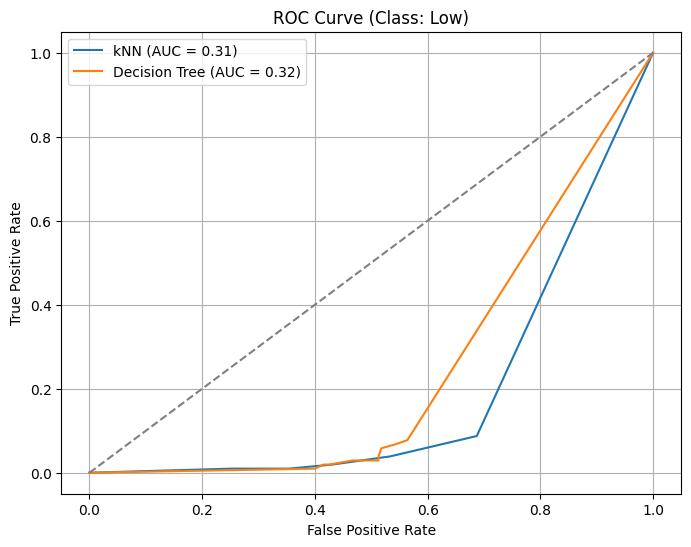

In [66]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

y_test_binarized = label_binarize(y_test, classes=['Low', 'Medium', 'High'])

y_prob_knn = knn.predict_proba(X_test)

y_prob_dt = dt.predict_proba(X_test)

fpr_knn, tpr_knn, _ = roc_curve(y_test_binarized[:, 0], y_prob_knn[:, 0])
fpr_dt, tpr_dt, _ = roc_curve(y_test_binarized[:, 0], y_prob_dt[:, 0])

roc_auc_knn = roc_auc_score(y_test_binarized, y_prob_knn, multi_class='ovr')
roc_auc_dt = roc_auc_score(y_test_binarized, y_prob_dt, multi_class='ovr')

print("kNN ROC AUC Score:", roc_auc_knn)
print("Decision Tree ROC AUC Score:", roc_auc_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Class: Low)')
plt.legend(loc='best')
plt.grid()
plt.show()

Выводы

kNN:

Точность модели kNN составляет 0.75, что указывает на удовлетворительное качество модели, но с заметным снижением точности, особенно для класса Medium.
ROC AUC для kNN составляет 0.31, что также указывает на неэффективность модели в плане разделения классов.

Дерево решений:

Точность модели дерева решений составила 0.71, что немного хуже, чем у kNN.
Дерево решений продемонстрировало результаты ниже по метрикам Precision, Recall и F1-score, что делает kNN более подходящим для данной задачи.

kNN в данном случае лучше из-за небольшого количество начальных данных.